<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/caidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image

#Carga de tablas_______________
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/sagomario.csv"
Sagomario = pd.read_csv(Url,sep=";",decimal=",")


In [ ]:
Sagomario
#Sagomario.info()



In [42]:
from numpy.core.fromnumeric import shape
from pickle import TRUE
#@title Carga general de datos
Qteorico=np.linspace(0, 20000, 20000, endpoint=True,dtype=int) #Nm3/h
Temp_celsius = 25 #@param {type:"integer"}
Altitud_m = 20 #@param {type:"number"}
atm_local=(1-0.00002257*Altitud_m)**5.256
#@markdown Indicar valor de presion de partida (tildar unidad de ingreso)
Barg = True #@param {type:"boolean"}
Kgcm2 = False #@param {type:"boolean"}
Pressure_in = 15 #@param {type:"number"}
Temp=(Temp_celsius+273.15)/273.15 #temperatura en kelvin

if Barg==True and Kgcm2== False:
   Pressure_op= Pressure_in*0.986923 #atm
elif Barg==False and Kgcm2== True:
   Pressure_op= Pressure_in*0.967841 # atm
else :
   print('Mensaje ERROR: Se requiere opción de unidad , Tildar solo una')

#print(atm_local)
#print(Temp*273.15)
#print(Temp)
Qnormalizado=np.round(Qteorico*(Temp*(1/(atm_local+Pressure_op))),decimals=2)

#Qteorico

#Qnormalizado


array([0.00000e+00, 7.00000e-02, 1.40000e-01, ..., 1.38134e+03,
       1.38141e+03, 1.38155e+03])

In [43]:
def velocidad(caudal,d):
  V=(caudal/3600)/(((np.pi)*((float(d)/1000)**2))/4)
  return [V]




In [44]:
#@title Tramo 1
Diametro = "8" #@param {type:"string"}
Schedule = "SCH80" #@param {type:"string"}

D=Sagomario.loc[Sagomario.loc[:,'DN'] ==Diametro]['DE']-Sagomario.loc[Sagomario.loc[:,'DN'] == Diametro][Schedule]*2
Velocity=np.round(velocidad(Qnormalizado,D),decimals=2)
#Velocity[np.where(Velocity>=9)]
Velocity=np.reshape(Velocity,(20000,-1))




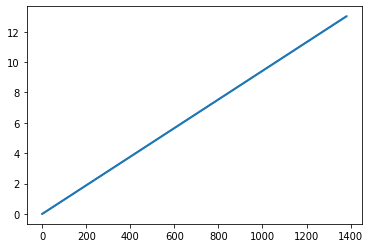

In [45]:
fig, ax = plt.subplots()
ax.plot(Qnormalizado, Velocity, linewidth=2.0)
plt.show()